In [65]:
import pandas as pd
import numpy as np

In [66]:
df = pd.read_csv('final_csv_test.csv')

In [67]:
df.tail()

,id,EDA,TEMP,BVP,HR
451265,S35,0.229625,99999.0,3.92,99999.0
451266,S35,0.229625,99999.0,9.85,99999.0
451267,S35,0.228344,99999.0,14.94,99999.0
451268,S35,0.229625,99999.0,19.16,99999.0
451269,S35,0.228344,99999.0,22.43,99999.0


In [68]:
df.isna().sum()

id      0
EDA     0
TEMP    0
BVP     0
HR      0
dtype: int64

In [69]:
# REPLACE 99999 by N/A for simplifiaction
df.replace(99999.0, 'na', inplace=True)

In [70]:
df.isnull().sum()

id      0
EDA     0
TEMP    0
BVP     0
HR      0
dtype: int64

In [71]:
df.head()

,id,EDA,TEMP,BVP,HR
0,S02,4.000000,4.0,64.0,1.0
1,S02,0.000000,34.79,-0.0,118.0
2,S02,0.622764,34.79,-0.0,113.5
3,S02,0.759875,34.79,-0.0,93.0
4,S02,0.883157,34.79,-0.0,93.25


In [72]:
na_count = (df == 'na').mean()
na_count

id      0.000000
EDA     0.000000
TEMP    0.000412
BVP     0.000000
HR      0.750695
dtype: float64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451270 entries, 0 to 451269
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      451270 non-null  object 
 1   EDA     451270 non-null  float64
 2   TEMP    451270 non-null  object 
 3   BVP     451270 non-null  float64
 4   HR      451270 non-null  object 
dtypes: float64(2), object(3)
memory usage: 17.2+ MB


In [74]:
target_column = 'HR'
df[target_column] = df[target_column].apply(lambda x: np.random.uniform(90, 180) if x == "na" else x)

# impute TEMP column
# Replace 'na' strings with np.nan in column 'A'
df['TEMP'] = df['TEMP'].replace('na', np.nan)

# Impute missing values in column 'A' using the mean of column 'A'
df['TEMP'] = df['TEMP'].fillna(df['TEMP'].mean())

# # Save the updated DataFrame back to the same CSV file
# file_path = 'combined_csv_test_HR.csv'
# df.to_csv(file_path, index=False)

C:\Users\GANESH\AppData\Local\Temp\ipykernel_2776\2230725276.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TEMP'] = df['TEMP'].replace('na', np.nan)


In [75]:
df.tail()

,id,EDA,TEMP,BVP,HR
451265,S35,0.229625,31.29009,3.92,154.536202
451266,S35,0.229625,31.29009,9.85,155.597160
451267,S35,0.228344,31.29009,14.94,159.010934
451268,S35,0.229625,31.29009,19.16,105.433384
451269,S35,0.228344,31.29009,22.43,119.836801


In [76]:
na_count = (df == 'na').mean()
na_count

id      0.0
EDA     0.0
TEMP    0.0
BVP     0.0
HR      0.0
dtype: float64

<Axes: >

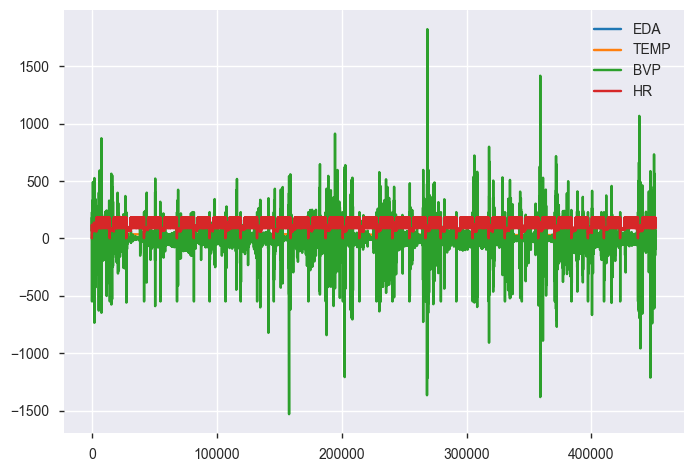

In [77]:
df.plot()

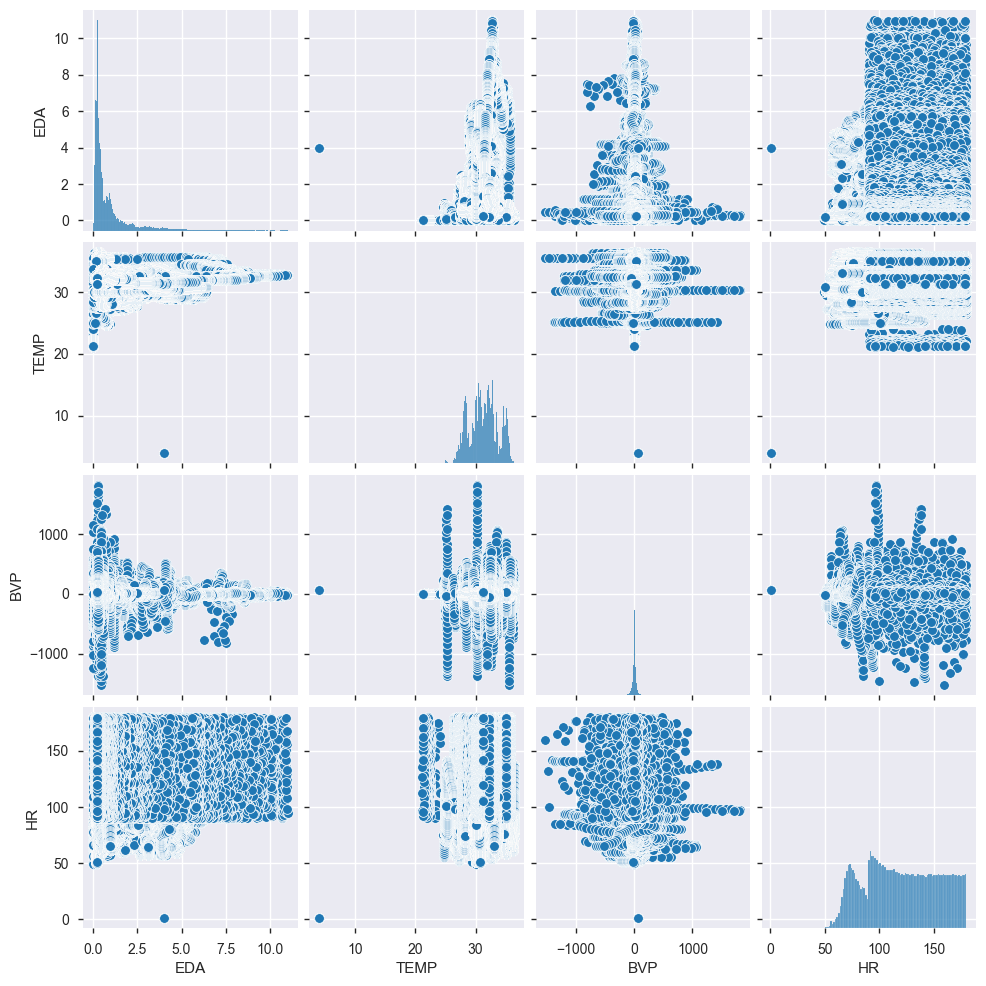

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

# Show the plot
plt.show()

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451270 entries, 0 to 451269
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      451270 non-null  object 
 1   EDA     451270 non-null  float64
 2   TEMP    451270 non-null  float64
 3   BVP     451270 non-null  float64
 4   HR      451270 non-null  float64
dtypes: float64(4), object(1)
memory usage: 17.2+ MB


In [80]:
na_count = (df == 'na').sum()
na_count

id      0
EDA     0
TEMP    0
BVP     0
HR      0
dtype: int64

In [81]:
df.describe()

,EDA,TEMP,BVP,HR
count,451270.000000,451270.000000,451270.000000,451270.000000
mean,0.957080,31.290090,0.023578,121.355108
std,1.324882,2.336219,67.463498,33.324104
min,0.000000,4.000000,-1531.900000,1.000000
25%,0.240890,29.690000,-13.710000,94.146243
50%,0.430794,31.310000,1.300000,120.307200
75%,1.040876,32.810000,15.620000,150.120735
max,11.005073,36.390000,1822.090000,179.999613


In [82]:
# Skewed data to normal data

from scipy import stats
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=False)
df['EDA'] = pt.fit_transform(df[['EDA']])

ModuleNotFoundError: No module named 'scipy'

In [ ]:
from ydata_profiling import ProfileReport

# Read the CSV file into a dataframe
#df = pd.read_csv(r'C:\Users\sahus\Stress-Prediction\final_csv_test.csv')

# Generate a profiling report
profile = ProfileReport(df, title="Data Profile Report", explorative=True)

# Save the report to an HTML file
profile.to_file("data_profile.html")

print("The profiling report has been generated!")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 215.22it/s]

The profiling report has been generated!


In [94]:
df.drop(['id'], axis=1, inplace=True)

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# X1 = [3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8]
# X2 = [5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3]
# plt.scatter(X1,X2)
# plt.show()

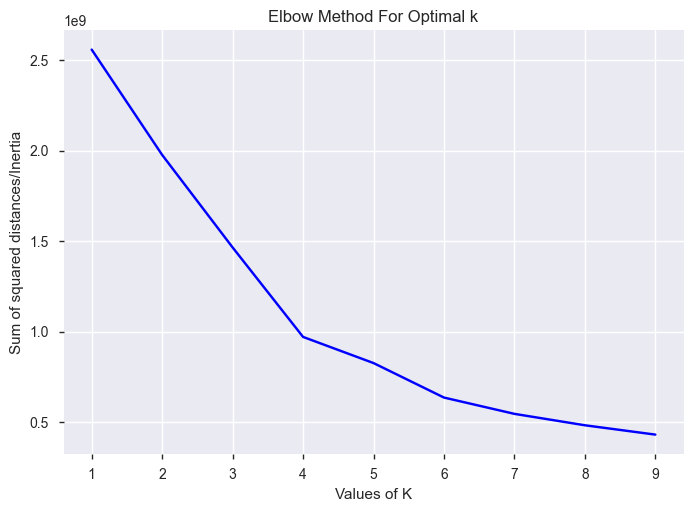

In [95]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [99]:
from sklearn.model_selection import train_test_split

X_train,X_test = train_test_split(df,test_size=0.20, random_state=41)

In [100]:
kmeans = KMeans(n_clusters=2)
kmeans.fit_predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [102]:
y_pred = kmeans.predict(X_test)

In [104]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_pred)

InvalidIndexError: (slice(None, None, None), 0)